In [6]:
# Import Statements
import numpy as np 
import matplotlib.pyplot as plt 
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
# Set up data
revs = np.asarray([
    'The new Amazon Review Summary tool is so awesome! I love how it tells me exactly what I need about a product',
    'The Amazon Review Summary tool honestly changed my life. It has been the biggest blesing I could have asked for',
    'I don\'t know how I\'ve lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!',
    'I HATE the Amazon Review Summary tool. It\'s absolutely horrible. Do not use!',
    'The Amazon Review Summary tool honestly makes me want to jump off a bridge. Please do NOT use!',
    'If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!',
])

In [8]:
# Encode articles 

In [9]:
# Loading model 
models = ['stsb-bert-base', 'stsb-roberta-base', 'stsb-bert-large', 'stsb-roberta-large']
model = SentenceTransformer(models[1])

In [10]:
# Retrieve vectors 
vecs = model.encode(revs)

In [11]:
# Running PCA on data 
pca = PCA(n_components = 5)
components = pca.fit_transform(vecs)
print('Percent variance explained: {:.2f}'.format(sum(pca.explained_variance_ratio_)))

Percent variance explained: 1.00


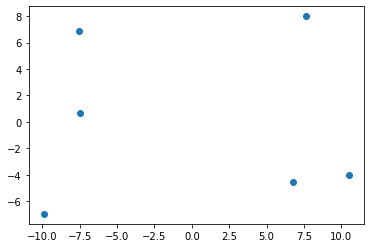

In [12]:
# Visualizing PCA
plt.scatter(components[:,0], components[:,1])

In [13]:
# Clustering 
K = 2
clusters = KMeans(n_clusters=K, random_state=0).fit(components)

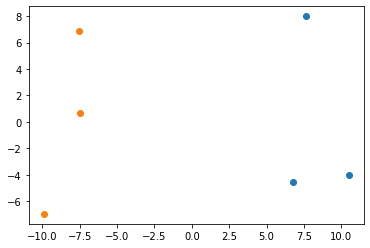

In [14]:
# Visualizing Clusters
for i in range(K):
    labels = clusters.labels_ == i
    plt.scatter(components[labels,0], components[labels,1])

In [15]:
# Printing out different clusters
for i in range(K):
    labels = clusters.labels_ == i
    print('Cluster #:', i)
    for j, review in enumerate(revs[labels]):
        print(j, review)

Cluster #: 0
0 I HATE the Amazon Review Summary tool. It's absolutely horrible. Do not use!
1 The Amazon Review Summary tool honestly makes me want to jump off a bridge. Please do NOT use!
2 If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!
Cluster #: 1
0 The new Amazon Review Summary tool is so awesome! I love how it tells me exactly what I need about a product
1 The Amazon Review Summary tool honestly changed my life. It has been the biggest blesing I could have asked for
2 I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!


In [16]:
# Finding review closest to each center 
centers = clusters.cluster_centers_
closest = [] 
for i in range(K):
    labels = clusters.labels_ == i
    dist = float('inf')
    closest_review = None 
    for review_vec, review in zip(components[labels],revs[labels]):
        dist_to_center = np.linalg.norm(review_vec - centers[i])
        if dist_to_center < dist:
            closest_review = review
    closest.append(review)
for i, r in enumerate(closest):
    print('Cluster Rep #', i, r)

Cluster Rep # 0 If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!
Cluster Rep # 1 I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!


In [30]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

text =" ".join(revs)
text = """
I can't fucking take it. I see an image of a random object posted and then I see it,
I fucking see it. "Oh that looks kinda like the among us guy" it started as. 
That's funny, that's a cool reference. But I kept going, I'd see a fridge that looked like among us, 
I'd see an animated bag of chips that looked like among us, I'd see a hat that looked like among us. 
And every time I'd burst into an insane, breath deprived laugh staring at the image as the words AMOGUS 
ran through my head. It's torment, psychological torture, I am being conditioned to laugh maniacly any 
time I see an oval on a red object. I can't fucking live like this... I can't I can't I can't I can't 
I can't! And don't get me fucking started on the words! I'll never hear the word suspicious again without 
thinking of among us. Someone does something bad and I can't say anything other than "sus." I could watch 
a man murder everyone I love and all I would be able to say is "red sus" and laugh like a fucking insane
person. And the word "among" is ruined. The phrase "among us" is ruined. I can't live anymore. Among us 
has destroyed my fucking life. I want to eject myself from this plane of existence. MAKE IT STOP!
"""

preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

# summmarize 
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=0,
                                    max_length=50,
                                    early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

original text preprocessed: 
 I can't fucking take it. I see an image of a random object posted and then I see it,I fucking see it. "Oh that looks kinda like the among us guy" it started as. That's funny, that's a cool reference. But I kept going, I'd see a fridge that looked like among us, I'd see an animated bag of chips that looked like among us, I'd see a hat that looked like among us. And every time I'd burst into an insane, breath deprived laugh staring at the image as the words AMOGUS ran through my head. It's torment, psychological torture, I am being conditioned to laugh maniacly any time I see an oval on a red object. I can't fucking live like this... I can't I can't I can't I can't I can't! And don't get me fucking started on the words! I'll never hear the word suspicious again without thinking of among us. Someone does something bad and I can't say anything other than "sus." I could watch a man murder everyone I love and all I would be able to say is "red sus" and laugh lik

In [20]:
" ".join(closest)

"If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad! I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!"